In [63]:
import pymongo

### Find candidate domain-specific stopwords and clean index

In [2]:
# CONNECT TO DB
import pymongo
mongo_client = pymongo.MongoClient("mongodb://localhost:27017/")
client = mongo_client["GreekParliamentProceedings"]
index = client["InvertedIndex"]
database = client["Database"]

In [20]:
# FIND NUMBER OF TERMS FOR EACH NUMDOC 
numdocs = list(index.find({ }, { "_id": 0, "list.numdoc": 1 }))
x = [numdocs[i]['list']['numdoc'] for i in range(len(numdocs))]
numdocs = {}
for numdoc in set(x):
    numdocs[numdoc] = x.count(numdoc)

In [21]:
print(f'Υπαρχουν {numdocs[1267]} documents με numdoc==1267')

Υπαρχουν 1 documents με numdoc==1267


(array([3052.,  794.,  315.,  180.,  110.,   86.,   63.,   43.,   38.,
          22.,   20.,   14.,   14.,   12.,   11.,    8.,    7.,    4.,
           8.,    5.,    4.,    5.,    5.]),
 array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.,  40000.,  45000.,  50000.,  55000.,  60000.,  65000.,
         70000.,  75000.,  80000.,  85000.,  90000.,  95000., 100000.,
        105000., 110000., 115000.]),
 <BarContainer object of 23 artists>)

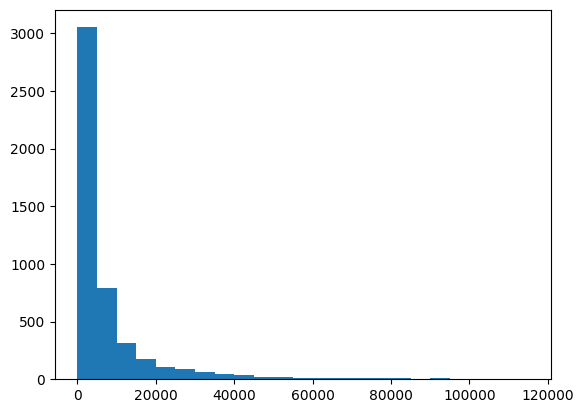

In [22]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots()
axs.hist(numdocs, bins=[i for i in range(0,120000,5000)])

In [ ]:
# CONSIDER TERMS WITH NUMDOC>100.000 AS DOMAIN SPECIFIC STOPWORDS AND SAVE THEM IN TXT FILE
threshold = list(index.find({"list.numdoc":{"$gt":100000}}, { "_id": 1, "list.numdoc": 1 }))
print([threshold[i]['_id'] for i in range(len(threshold))])
with open('domain-specific-stopwords.txt', 'w', encoding='utf8') as f:
    for i in range(len(threshold)):
        f.write(threshold[i]['_id'])
        f.write('\n')

In [26]:
# SAMPLE TERMS WITH NUMDOC<3
threshold = list(index.find({"list.numdoc":{"$lt":3}}, { "_id": 1, "list.numdoc": 1 }))
print([threshold[i]['_id'] for i in range(len(threshold))][200:230])
# TOTAL NUMBER OF TERMS WITH NUMDOC<3
print(len(threshold))

['τσαλδαρης)', 'μισσαηλιδ', 'παραβολον', 'επικυρουτα', 'επιδειχθεντ', 'εγλιτως', 'επλαστογραφ', '0112', 'αλφοnσινα', 'αλφοσιν', 'εισπλευς', 'αυταδρον', 'alfonsinα', 'καθαρσολογ', 'χασομ', 'κρινομ', 'περασομ', '0116μα', '68/88', '2891/77', 'εκακ)', '1697/79', '2891/77)', 'lloyd', 'φλαμιγκ', 'ιtco', 'πραγματοποιηθηκεσελιδ', '0117', 'επιστραφεν', 'κατεβλευς']
316424


In [7]:
# FIND TERMS IN THE INDEX WITH THE SPECIFIED PATTERN IN ORDER TO REMOVE THEM
import re
to_remove = list(index.find({"_id":{"$regex":"^[0-9][0-9][0-9].*[α-ω]$"}},{ "_id": 1, "list": 0}))
print(to_remove[:100])

[{'_id': '000/8/245258/σ'}, {'_id': '000/οικ'}, {'_id': '0000%απο'}, {'_id': '00010ο'}, {'_id': '00012%απο'}, {'_id': '00016%απο'}, {'_id': '0002%απο'}, {'_id': '00020%απο'}, {'_id': '00024%απο'}, {'_id': '0002γραφημα'}, {'_id': '0002θεωρουμε'}, {'_id': '0003%απο'}, {'_id': '0003επιλεξει'}, {'_id': '0004γων'}, {'_id': '0006%απο'}, {'_id': '0006που'}, {'_id': '0008%απο'}, {'_id': '0008μοκρατια'}, {'_id': '0008ο'}, {'_id': '0009ορισμενες'}, {'_id': '000αλλοτε'}, {'_id': '000αυτα'}, {'_id': '000β'}, {'_id': '000γ'}, {'_id': '000για'}, {'_id': '000δ'}, {'_id': '000διδακτικο'}, {'_id': '000δραχμες'}, {'_id': '000δραχμων'}, {'_id': '000δρχ'}, {'_id': '000ε'}, {'_id': '000επι'}, {'_id': '000ετος'}, {'_id': '000ευρω'}, {'_id': '000η'}, {'_id': '000και'}, {'_id': '000καταστηματαρχες'}, {'_id': '000μοναδων'}, {'_id': '000νται'}, {'_id': '000ο'}, {'_id': '000πανω'}, {'_id': '000προηγουμενησμετ'}, {'_id': '000σελιδα'}, {'_id': '000στρ'}, {'_id': '000στρεμματα'}, {'_id': '000στρεμματων'}, {'_id': '

In [4]:
# FIND SPEECH IDs THAT ARE NOT PART OF THE INDEX
# MEANS THAT THOSE SPEECHES HAVE LESS THAN 20 TERMS AFTER PREPROCESSING

# GET ALL POSTING LISTS FROM INDEX
res = list(index.find({ }, { "_id": 0, "list.postinglist": 1 }))

# FIND DISTINCT DOCUMENT IDs 
total = set()
for i in range(len(res)):
    total_documents = set((res[i]['list']['postinglist'].keys()))
    total.update(total_documents)

# SAVE INDEXES AS INTEGERS IN A PICKLE FILE FOR LATER USE
total = list(total)
for i in range(len(total)):
    total[i] = int(total[i])
import pickle
with open('speech_indexes.pickle', 'rb') as handle:
    speech_indexes = pickle.load(handle)
print(len(speech_indexes))

<class 'str'>
